# This is the code for the Chapter 2 - clustering. We are using 3 algorithms: kmeans, hierarchical and DBSCAN. The same dataset is used for clustering. The data is uploaded to git repo.

In [129]:
import pandas as pd
vehicle_df = pd.read_csv('vehicle.csv').dropna()

In [130]:
vehicle_df.shape

(813, 19)

In [131]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [132]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [60]:
#Class is categorical, use value_counts function
pd.value_counts(vehicle_df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

<AxesSubplot:>

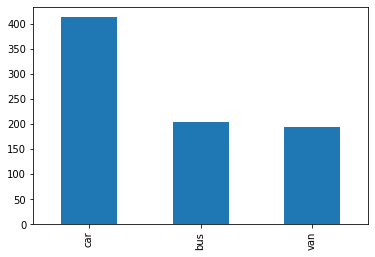

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

<AxesSubplot:>

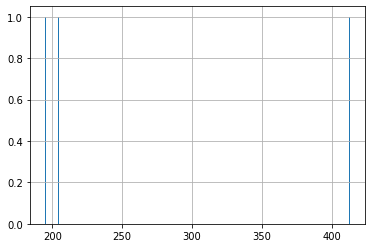

In [55]:
pd.value_counts(vehicle_df['class']).hist(bins=300)

In [56]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Kmeans Clustering

In [ ]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [133]:
vehicle_df_1 = vehicle_df.drop('class', axis=1)

In [134]:
from scipy.stats import zscore
vehicle_df_1_z = vehicle_df_1.apply(zscore)

In [135]:
vehicle_df_1_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [136]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_standard = sc.fit_transform(vehicle_df_1) 

/Users/vaibhavverdhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vaibhavverdhan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


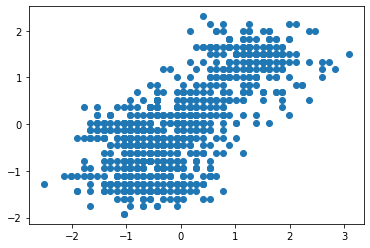

In [137]:
plt.scatter(X_standard[:,0], X_standard[:,1])
plt.show()

Text(0.5, 1.0, 'Selecting the values of k with the Elbow Method for k-means clustering')

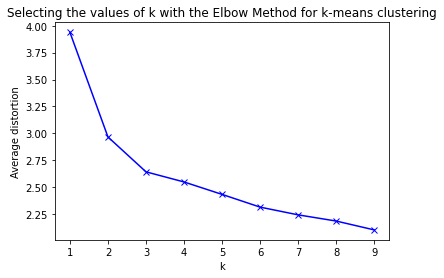

In [29]:
from sklearn.cluster import KMeans

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_standard)
    prediction=model.predict(X_standard)
    meanDistortions.append(sum(np.min(cdist(X_standard, model.cluster_centers_, 'euclidean'), axis=1)) / X_standard
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting the values of k with the Elbow Method for k-means clustering')

In [15]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [16]:
kmeans.fit(X_standard)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [17]:
centroids = kmeans.cluster_centers_

In [18]:
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

In [19]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(X_standard) )

In [20]:
## creating a new dataframe only for labels and converting it into categorical variable
dataframe_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

dataframe_labels['labels'] = dataframe_labels['labels'].astype('category')

In [21]:
# Joining the label dataframe with the data frame.
dataframe_labeled = vehicle_df_1.join(dataframe_labels)

In [22]:
dataframe_analysis = (dataframe_labeled.groupby(['labels'] , axis=0)).head(1234)  # the groupby creates a groupeddataframe that needs 
dataframe_analysis

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,labels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,NaN
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,NaN
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,NaN
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,NaN


In [23]:
dataframe_labeled['labels'].value_counts()  

0    297
1    251
2    232
Name: labels, dtype: int64

In [24]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering on vehicles dataset')

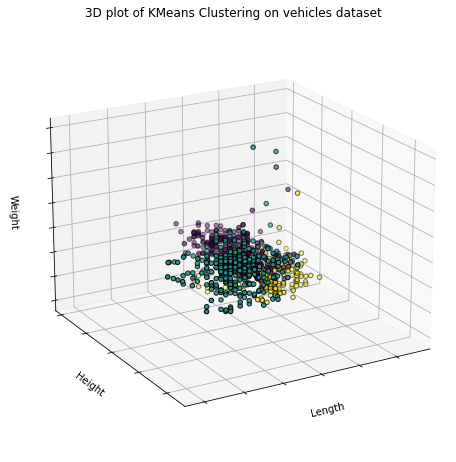

In [40]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(vehicle_df_1_z)
labels = kmeans.labels_
ax.scatter(vehicle_df_1_z.iloc[:, 0], vehicle_df_1_z.iloc[:, 1], vehicle_df_1_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering on vehicles dataset')

In [31]:
# Let us try with K = 2
final_model=KMeans(2)


In [33]:
final_model.fit(X_standard)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
prediction=final_model.predict(X_standard)



In [36]:
#Append the prediction 
vehicle_df["GROUP"] = prediction
print("Groups Assigned : \n")


Groups Assigned : 



In [38]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,GROUP
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0


In [39]:
vehicle_df[["class", "GROUP"]]

,class,GROUP
0,van,0
1,van,0
2,car,1
3,van,0
4,bus,0
...,...,...
841,car,0
842,van,0
843,car,1
844,car,0


# Hierarchical Clustering

In [41]:
#Use ward as linkage metric and distance as Eucledian

In [93]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z_df_average = linkage(X_standard, 'average', metric='euclidean')
Z_df_average.shape

(812, 4)

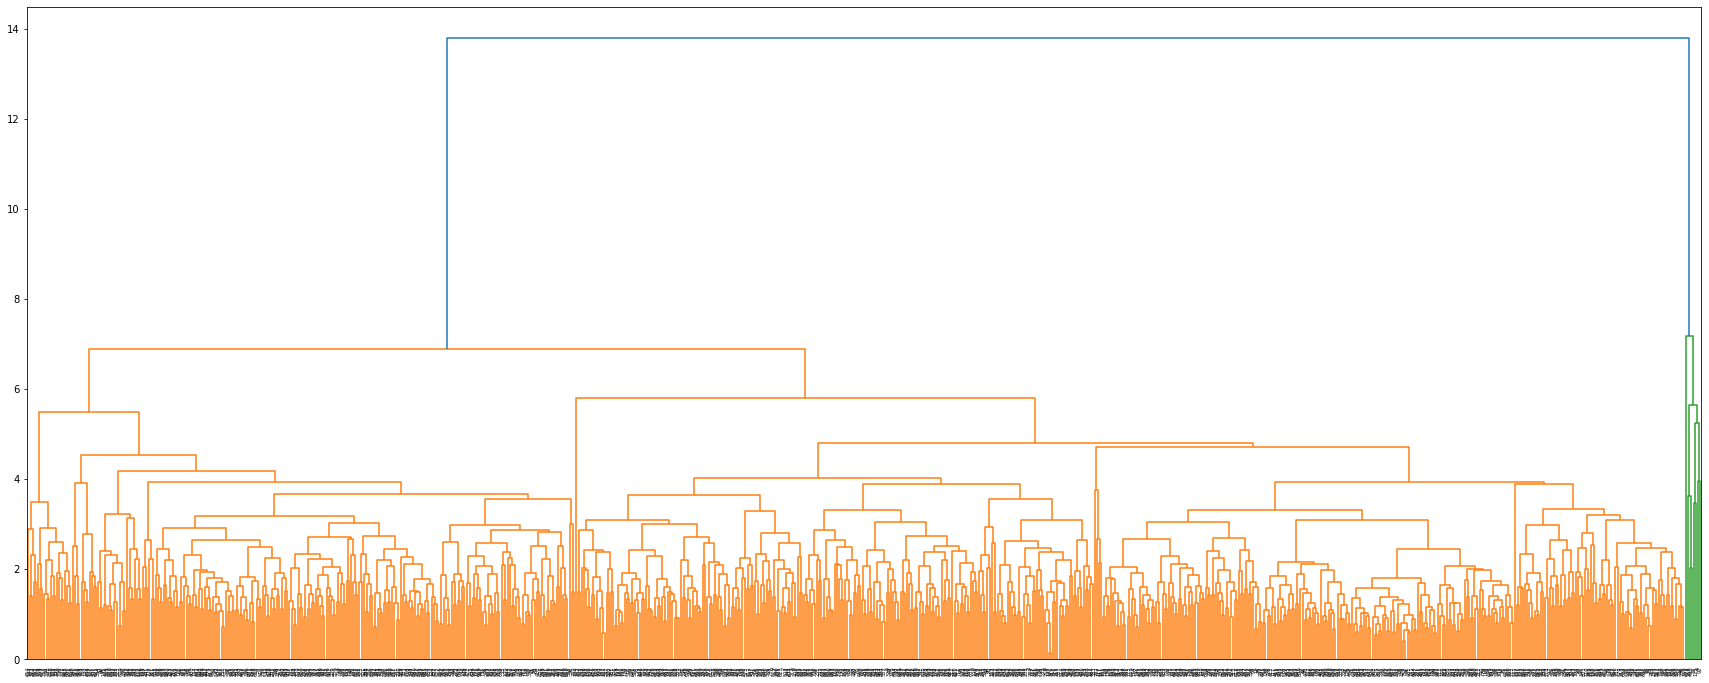

In [94]:
plt.figure(figsize=(30, 12))
dendrogram(Z_df_average)
plt.show()

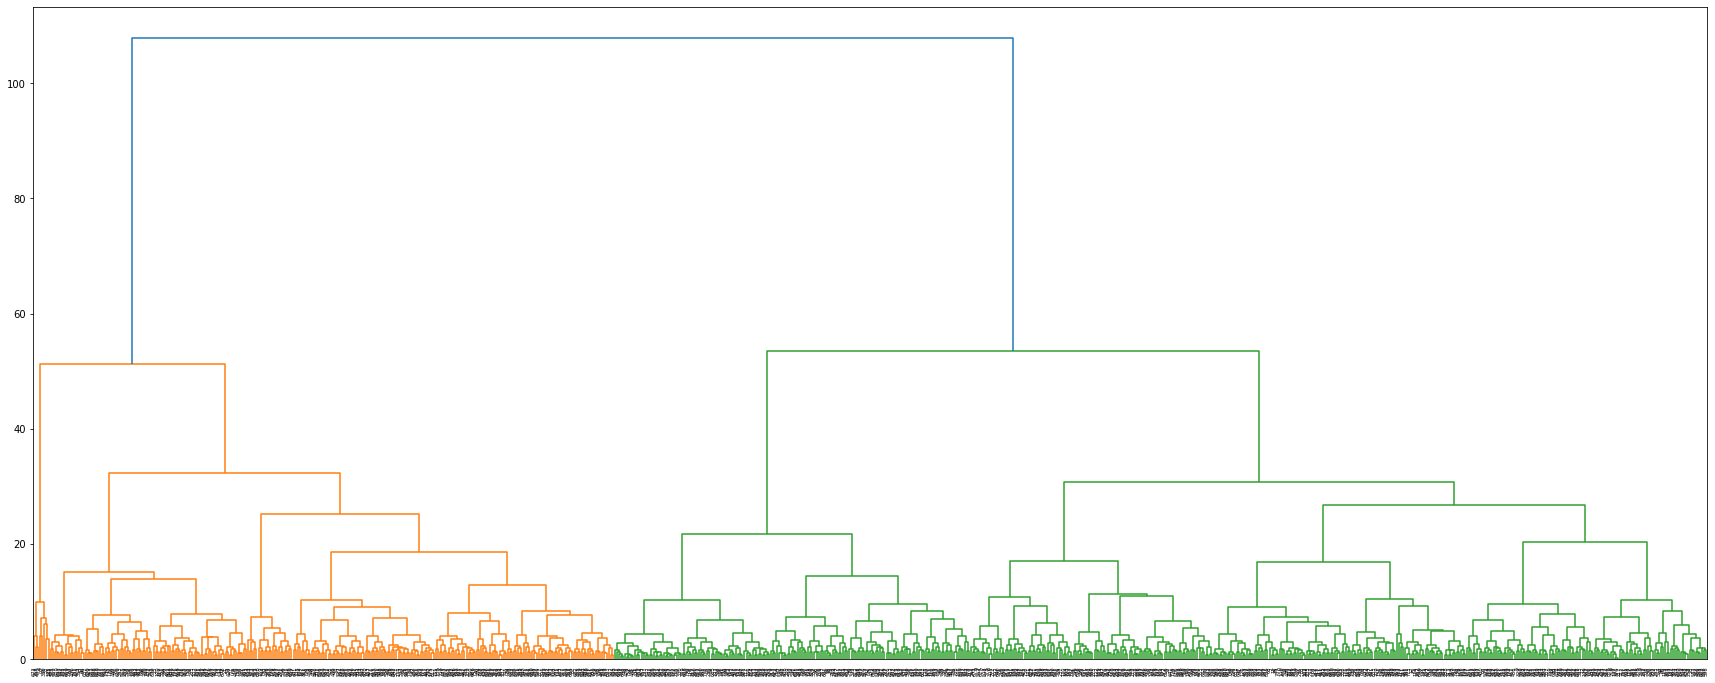

In [96]:

from scipy.cluster.hierarchy import dendrogram, linkage
Z_df_ward = linkage(X_standard, 'ward', metric='euclidean')
Z_df_ward.shape
plt.figure(figsize=(30, 12))
dendrogram(Z_df_ward)
plt.show()

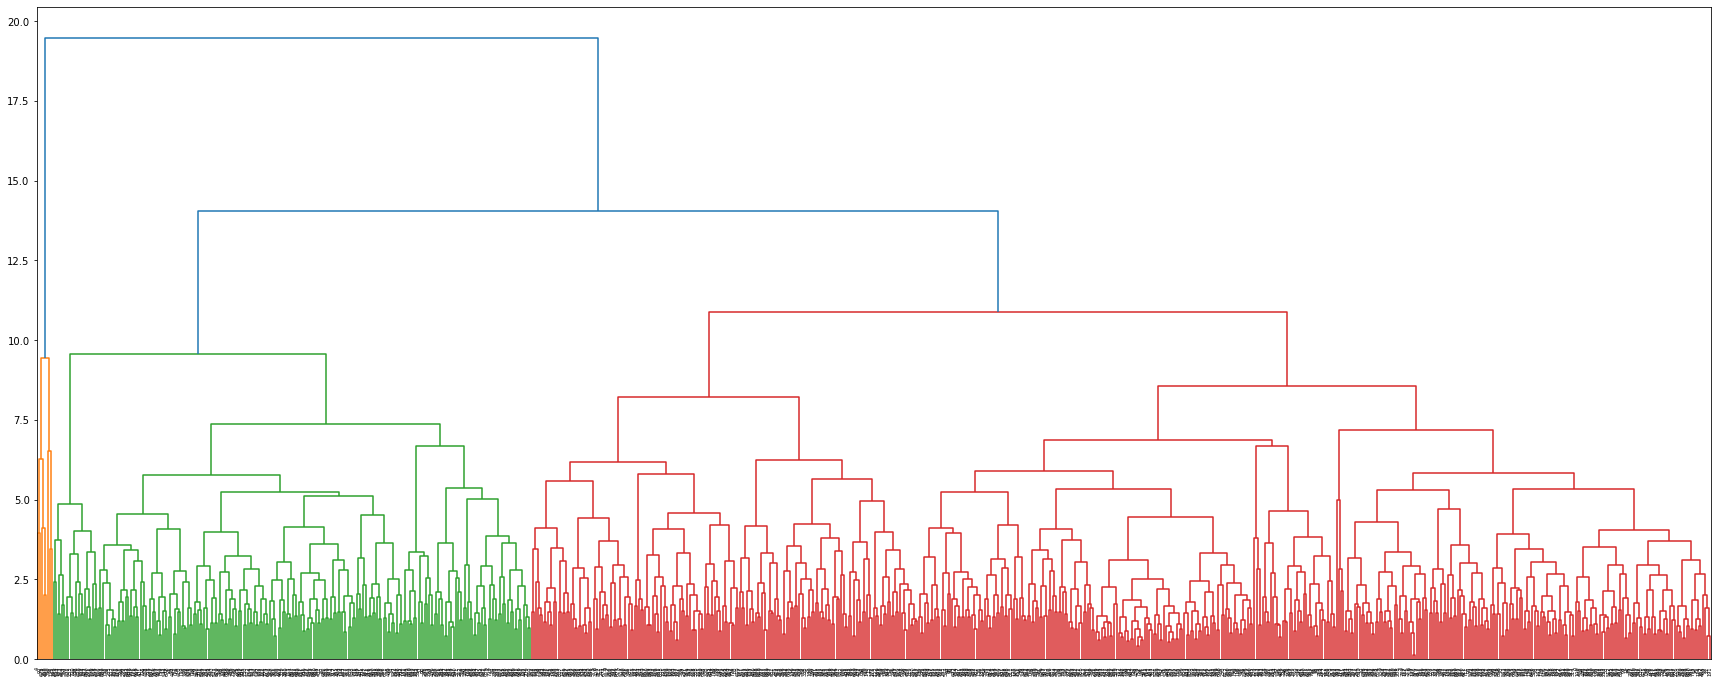

In [97]:

from scipy.cluster.hierarchy import dendrogram, linkage
Z_df_complete = linkage(X_standard, 'complete', metric='euclidean')
Z_df_complete.shape
plt.figure(figsize=(30, 12))
dendrogram(Z_df_complete)
plt.show()

Recreate the dendrogram for last 10 merged clusters

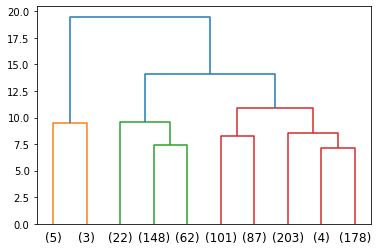

In [123]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_df_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()

In [143]:
max_distance = 15

In [144]:
from scipy.cluster.hierarchy import fcluster
hier_clusters = fcluster(Z_df_complete, max_distance, criterion='distance')
hier_clusters

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [145]:
len(set(hier_clusters))

2

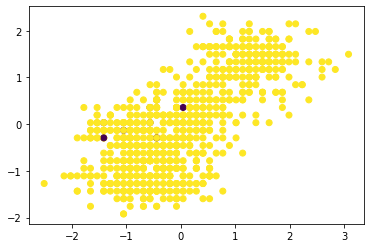

In [146]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X_standard[:,0], X_standard[:,1], c=hier_clusters)  # plot points with cluster dependent colors
plt.show()

# DBSCAN

In [94]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.neighbors import NearestNeighbors


In [138]:
db_default = DBSCAN(eps = 0.0375, min_samples = 6).fit(X_standard) 
labels = db_default.labels_ 

In [139]:
list(set(labels))

[-1]

In [140]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_standard)
distances, indices = nbrs.kneighbors(X_standard)

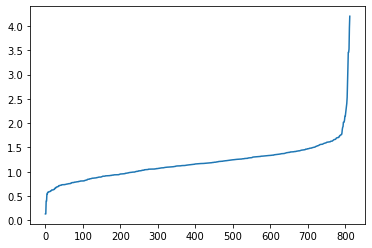

In [141]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [146]:
db_default = DBSCAN(eps=1.5, min_samples=10)
db_default.fit(X_standard)

DBSCAN(algorithm='auto', eps=2.0, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1]

In [126]:
clusters = db_default.labels_

In [152]:
list(set(clusters))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1]

In [168]:
colors = ['blue', 'red', 'orange', 'green', 'purple', 'black', 'brown', 'cyan', 'yellow', 'pink']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

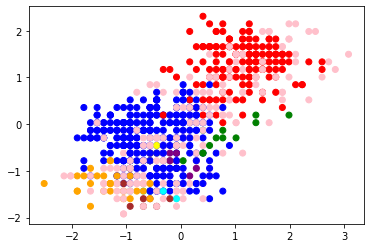

In [169]:
plt.scatter(X_standard[:,0], X_standard[:,1], c=vectorizer(clusters))